In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import os

directory = 'neg'

def convert_to_df(path):
    df = pd.read_csv(path,delimiter="  ", header=None)
    df = pd.DataFrame({0: [', '.join(df[0].str.strip('"').tolist())]})
    return df
frames=[]

for file in os.listdir(directory):
    df=convert_to_df(directory+"\\"+file)
    frames.append(df)

    
df_final_n = pd.concat(frames)

df_final_n.loc[:,'sentiment'] = [0 for i in range(1000)]

df_final_n.head()







C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\2822271656.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\2822271656.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\2822271656.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you 

,0,sentiment
0,"plot : two teen couples go to a church party ,...",0
0,"the happy bastard's quick movie review, damn t...",0
0,it is movies like these that make a jaded movi...,0
0,"quest for camelot "" is warner bros . ' first ...",0
0,synopsis : a mentally unstable man undergoing ...,0


In [68]:
directory = 'pos'

def convert_to_df(path):
    df = pd.read_csv(path,delimiter="  ", header=None)
    df = pd.DataFrame({0: [', '.join(df[0].str.strip('"').tolist())]})
    return df
frames=[]

for file in os.listdir(directory):
    df=convert_to_df(directory+"\\"+file)
    frames.append(df)

df_final_p = pd.concat(frames)

df_final_p.loc[:,'sentiment'] = [1 for i in range(1000)]    



df_final_p.head()

C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\911201263.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\911201263.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="  ", header=None)
C:\Users\Mohamed-Lemine\AppData\Local\Temp\ipykernel_18544\911201263.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

,0,sentiment
0,films adapted from comic books have had plenty...,1
0,every now and then a movie comes along from a ...,1
0,you've got mail works alot better than it dese...,1
0,"jaws "" is a rare film that grabs your attenti...",1
0,moviemaking is a lot like being the general ma...,1


In [79]:
df_final_pn=pd.concat([df_final_n,df_final_p])

df_final_pn.head()

,0,sentiment
0,"plot : two teen couples go to a church party ,...",0
0,"the happy bastard's quick movie review, damn t...",0
0,it is movies like these that make a jaded movi...,0
0,"quest for camelot "" is warner bros . ' first ...",0
0,synopsis : a mentally unstable man undergoing ...,0


In [80]:
df_final_pn = df_final_pn.sample(frac=1)
df_final_pn.head()

,0,sentiment
0,note : some may consider portions of the follo...,1
0,"mandingo "" has traditionally been seen as one...",0
0,steven spielberg is now considered as one of t...,1
0,"crazy/beautiful "" suffers from the damned-if-...",1
0,"when you get out of jail , you can kill him ....",1


In [81]:
df_final_pn= df_final_pn.rename(columns={0:'review'})
df_final_pn.head()

,review,sentiment
0,note : some may consider portions of the follo...,1
0,"mandingo "" has traditionally been seen as one...",0
0,steven spielberg is now considered as one of t...,1
0,"crazy/beautiful "" suffers from the damned-if-...",1
0,"when you get out of jail , you can kill him ....",1


In [82]:
df_final_pn =  df_final_pn.set_index(pd.Index([i for i in range(2000)]))


In [83]:
df_final_pn.head(20)

,review,sentiment
0,note : some may consider portions of the follo...,1
1,"mandingo "" has traditionally been seen as one...",0
2,steven spielberg is now considered as one of t...,1
3,"crazy/beautiful "" suffers from the damned-if-...",1
4,"when you get out of jail , you can kill him ....",1
5,"the computer-animated comedy "" shrek "" is desi...",1
6,written by john grisham and robert altman ( as...,1
7,roman emperor marcus aurelius ( richard harris...,1
8,"oh my god , i sounded just like a mother ! , ...",1
9,i tried hard not like this movie without succe...,1


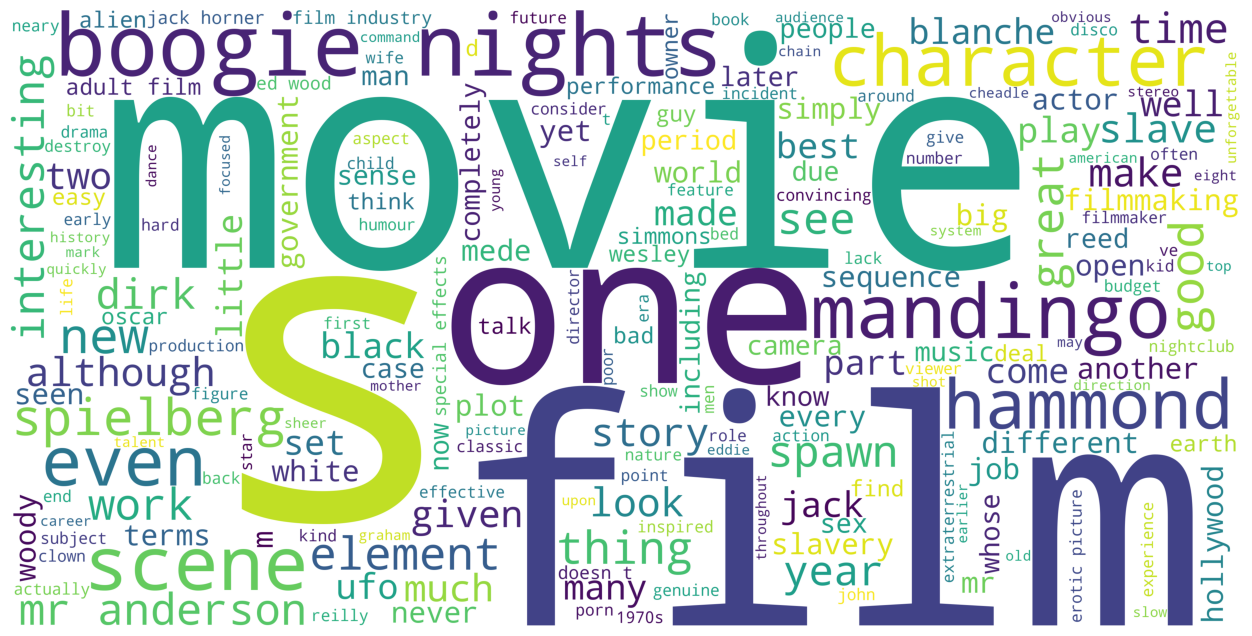

In [85]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


action = df_final_pn[df_final_pn['review'] == True]
action_text = df_final_pn['review'].values

wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [86]:
import string

exclude = set(string.punctuation)
def remove_punctuation(row):
    row.review = ''.join(ch for ch in row.review if ch not in exclude)
    return row
df_final_pn = df_final_pn.apply(remove_punctuation, axis = 1)

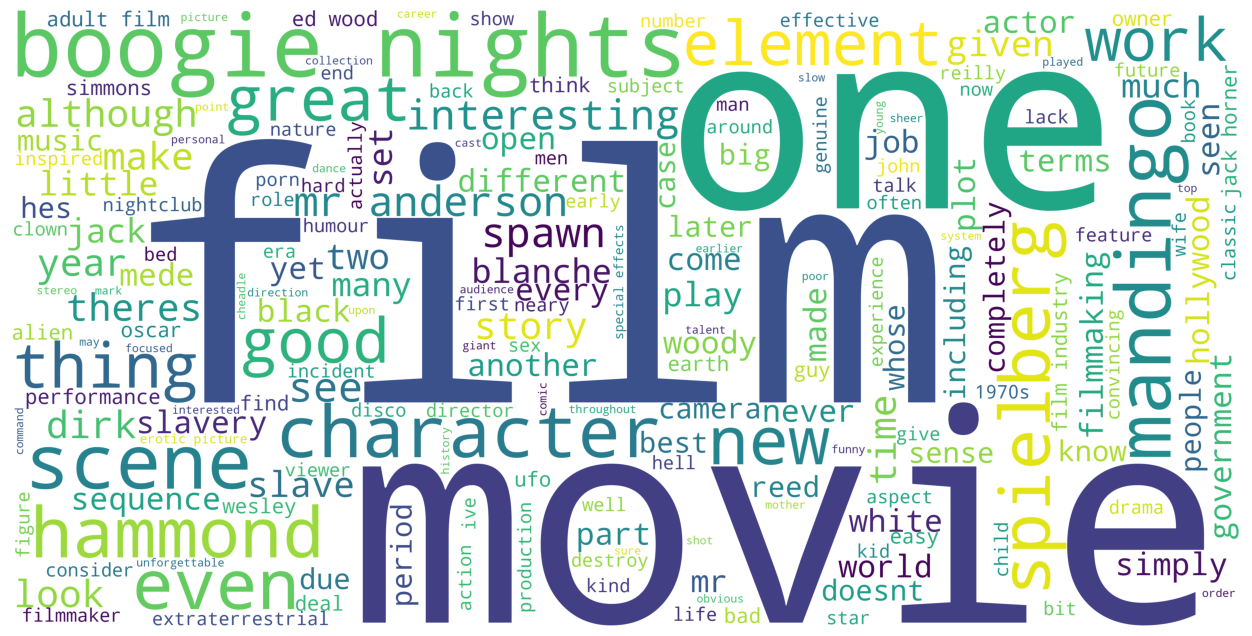

In [87]:

action = df_final_pn[df_final_pn['review'] == True]
action_text = df_final_pn['review'].values

wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [111]:
from nltk.corpus import stopwords 

stop = stopwords.words("english")

In [112]:

df_final_pn['review'] = df_final_pn['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [114]:
df_final_pn.review[124]

'reviewer ignorant hand responsible delivering original version abyss 1989 whether wa meddling studio executive work writerdirector james cameron original cut underwater scifi thriller wa entertaining enough also quite seriously flawed main problem wa fairly simple film climax wa unworthy buildup someone 20th century fox doubt cameron must agreed 1993 came theatrical release abyss special edition available video seems timely reevaluate newly revamped state nearmasterpiece despite borrowing film like 2010 odyssey two alien close encounter third kind plot thus meet crew experimental underwater mobile oil rig designed hardnosed lindsay mastrantonio captained soontobedivorced husband bud ed harris rig crew diverted normal duty navy seek help investigating mysterious sinking u nuclear submarine requiring dive partway three mile deep trench three navy diver arrive command operation led edgy lieutenant coffey biehn series strange sighting soon convinces least one member civilian crew whoever 

In [115]:
# we will lemmatize the words
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
df_final_pn['review'] = df_final_pn['review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df_final_pn.review[124]

[nltk_data] Downloading package wordnet to C:\Users\Mohamed-
[nltk_data]     Lemine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Mohamed-
[nltk_data]     Lemine\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'reviewer ignorant hand responsible delivering original version abyss 1989 whether wa meddling studio executive work writerdirector james cameron original cut underwater scifi thriller wa entertaining enough also quite seriously flawed main problem wa fairly simple film climax wa unworthy buildup someone 20th century fox doubt cameron must agreed 1993 came theatrical release abyss special edition available video seems timely reevaluate newly revamped state nearmasterpiece despite borrowing film like 2010 odyssey two alien close encounter third kind plot thus meet crew experimental underwater mobile oil rig designed hardnosed lindsay mastrantonio captained soontobedivorced husband bud ed harris rig crew diverted normal duty navy seek help investigating mysterious sinking u nuclear submarine requiring dive partway three mile deep trench three navy diver arrive command operation led edgy lieutenant coffey biehn series strange sighting soon convinces least one member civilian crew whoever 

In [117]:
# we will also do a stemming of the words to see if it improves the model
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df_final_pn['review_stemming'] = df_final_pn['review'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df_final_pn.review_stemming[124]

'review ignor hand respons deliv origin version abyss 1989 whether wa meddl studio execut work writerdirector jame cameron origin cut underwat scifi thriller wa entertain enough also quit serious flaw main problem wa fairli simpl film climax wa unworthi buildup someon 20th centuri fox doubt cameron must agre 1993 came theatric releas abyss special edit avail video seem time reevalu newli revamp state nearmasterpiec despit borrow film like 2010 odyssey two alien close encount third kind plot thu meet crew experiment underwat mobil oil rig design hardnos lindsay mastrantonio captain soontobedivorc husband bud ed harri rig crew divert normal duti navi seek help investig mysteri sink u nuclear submarin requir dive partway three mile deep trench three navi diver arriv command oper led edgi lieuten coffey biehn seri strang sight soon convinc least one member civilian crew whoever whatev theyr deal memor put arent speak russian meanwhil surfac hurrican brew even wors seri incid around cuba in

In [118]:
cv = CountVectorizer()
X = cv.fit_transform(df_final_pn['review'])
y = df_final_pn['sentiment']

In [119]:
#we will create a bag of words model after stemming
cv_stemming = CountVectorizer()
X_stemming = cv_stemming.fit_transform(df_final_pn['review_stemming'])
y_stemming = df_final_pn['sentiment']

In [120]:
#we will also create a tfidf model after lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df_final_pn['review'])
y_tfidf = df_final_pn['sentiment']

In [121]:
# we will also create a tfidf model after stemming
tfidf_stemming = TfidfVectorizer()
X_tfidf_stemming = tfidf_stemming.fit_transform(df_final_pn['review_stemming'])
y_tfidf_stemming = df_final_pn['sentiment']

In [122]:
#we will split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #lemmatization
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming = train_test_split(X_stemming, y_stemming, test_size=0.2, random_state=42) #stemming

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42) #tfidf lemmatization
X_train_tfidf_stemming, X_test_tfidf_stemming, y_train_tfidf_stemming, y_test_tfidf_stemming = train_test_split(X_tfidf_stemming, y_tfidf_stemming, test_size=0.2, random_state=42) #tfidf stemming

In [123]:
#we will use a multinomial naive bayes model with lemmatization and bag of words
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)


#we will use a multinomial naive bayes model with stemming and bag of words
nb_stemming = MultinomialNB()
nb_stemming.fit(X_train_stemming, y_train_stemming)
preds_stemming = nb_stemming.predict(X_test_stemming)


#we will use a multinomial naive bayes model with bag of words and tfidf
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
preds_tfidf = nb_tfidf.predict(X_test_tfidf)


#we will use a multinomial naive bayes model with stemming and tfidf
nb_tfidf_stemming = MultinomialNB()
nb_tfidf_stemming.fit(X_train_tfidf_stemming, y_train_tfidf_stemming)
preds_tfidf_stemming = nb_tfidf_stemming.predict(X_test_tfidf_stemming)



In [124]:
#we will evaluate the model with lemmatization and bag of words
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       207
           1       0.78      0.81      0.80       193

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

[[164  43]
 [ 37 156]]
